In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from pep2fragments import get_cut_bond_idx

bonds:  [5, 8, 19, 22, 23, 26, 52, 49, 59, 56, 17, 18, 10, 43]
atoms:  [[5, 6], [8, 9], [19, 20], [22, 23], [23, 24], [26, 27], [51, 53], [5, 50], [58, 60], [53, 57], [17, 18], [18, 19], [10, 11], [43, 44]]


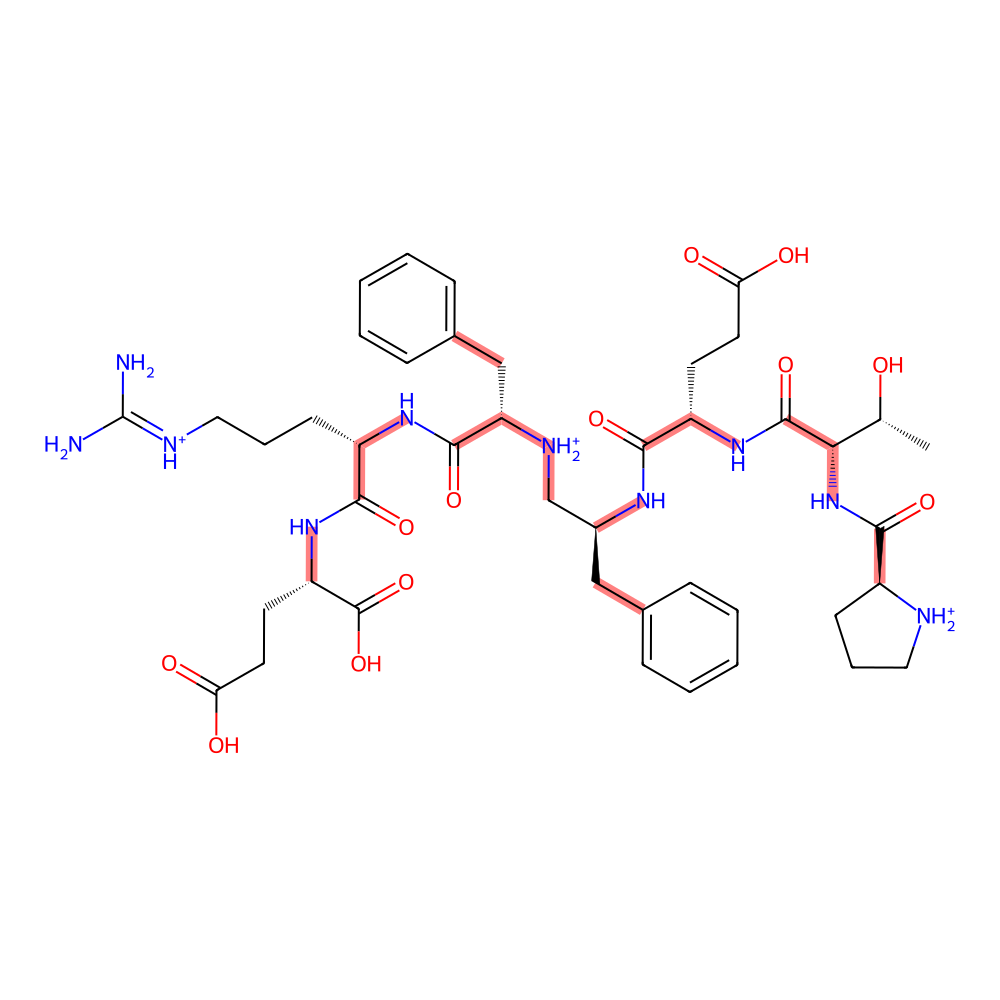

In [4]:
smi = 'OC(=O)CC[C@@H](C(=O)N[C@@H](Cc1ccccc1)C[NH2+][C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)O)CCC(=O)O)CCC[NH+]=C(N)N)Cc1ccccc1)NC(=O)[C@H]([C@H](O)C)NC(=O)[C@H]1[NH2+]CCC1'
mol = Chem.MolFromSmiles(smi)
break_bonds, break_bonds_atoms = get_cut_bond_idx(mol, side_chain_cut = True)

print("bonds: ",break_bonds)
print("atoms: ", break_bonds_atoms)

highlight_bonds = []
for bond in mol.GetBonds():
    if bond.GetIdx() in break_bonds:
        highlight_bonds.append(bond.GetIdx())
Draw.MolToImage(mol, highlightBonds=highlight_bonds, size = (1000, 1000))

In [24]:
# Draw.MolsToGridImage([mol], molsPerRow=1, subImgSize=(1000, 1000))

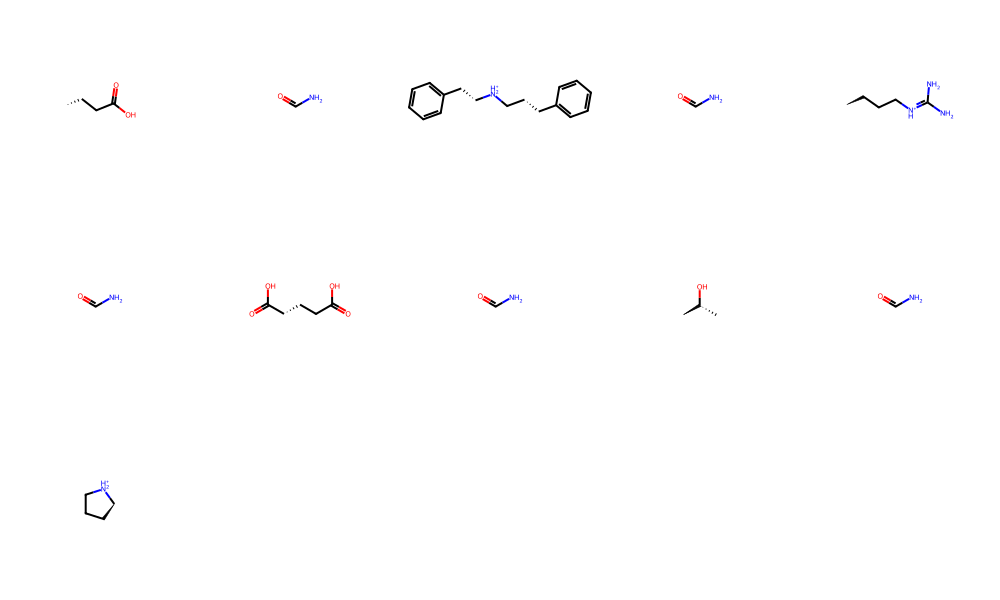

In [43]:
smi = 'OC(=O)CC[C@@H](C(=O)N[C@@H](Cc1ccccc1)C[NH2+][C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)O)CCC(=O)O)CCC[NH+]=C(N)N)Cc1ccccc1)NC(=O)[C@H]([C@H](O)C)NC(=O)[C@H]1[NH2+]CCC1'
mol = Chem.MolFromSmiles(smi)
break_bonds, break_bonds_atoms = get_cut_bond_idx(mol, side_chain_cut = False)
tmp = Chem.FragmentOnBonds(mol, break_bonds,addDummies=False)
frags_mol_lst = Chem.GetMolFrags(tmp, asMols=True)
    
Draw.MolsToGridImage(list(frags_mol_lst), molsPerRow=5, subImgSize=(200, 200))

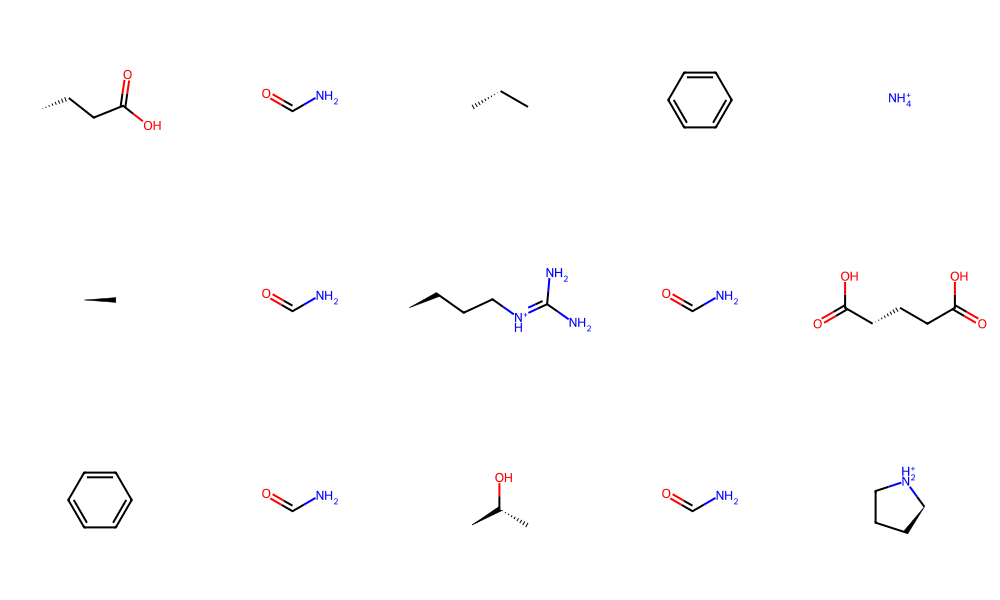

In [44]:
smi = 'OC(=O)CC[C@@H](C(=O)N[C@@H](Cc1ccccc1)C[NH2+][C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)O)CCC(=O)O)CCC[NH+]=C(N)N)Cc1ccccc1)NC(=O)[C@H]([C@H](O)C)NC(=O)[C@H]1[NH2+]CCC1'
mol = Chem.MolFromSmiles(smi)
break_bonds, break_bonds_atoms = get_cut_bond_idx(mol, side_chain_cut = True)
tmp = Chem.FragmentOnBonds(mol, break_bonds,addDummies=False)
frags_mol_lst = Chem.GetMolFrags(tmp, asMols=True)
    
Draw.MolsToGridImage(list(frags_mol_lst), molsPerRow=5, subImgSize=(200, 200))